# Check the match win Streak vs Outcome

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from copy import deepcopy
import sys
sys.path.append('../functions')
from IVfunctions import * 
from PreproFunctions import * 

In [154]:
#Load in the player data
df_players = pd.read_csv('../data/PlayerData_v1.csv',index_col=0)

#Load in the match data
df_matches = pd.read_csv('../data/MatchData_v2.csv',index_col=0)

df_matches_v3 = top_down_preproc(df_players,df_matches,2024) #Remove 2024 data
#Join on the season_win_rate and win_streak for the opponent
df_matches_v3 = df_matches_v3.merge(df_matches_v3[['Opponent','Season','Round','season_win_rate','win_streak']],\
                    left_on=['Team','Season','Round'],right_on=['Opponent','Season','Round'],suffixes=('_team','_opp'))

#Remove Opponent_opp and rename Opponent_team
df_matches_v3 = df_matches_v3.drop('Opponent_opp',axis=1)
df_matches_v3.rename(columns={'Opponent_team':'Opponent'}, inplace=True)

In [174]:
df_win_streaks = df_matches_v3.loc[(df_matches_v3['Season']>=2017)&\
                  (df_matches_v3['Outcome']==0),:]

<Axes: >

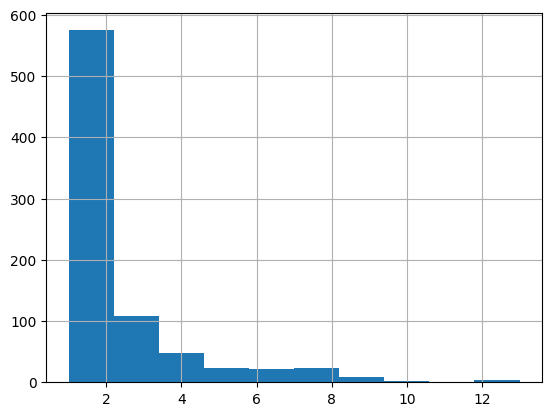

In [166]:
#Overall histogram of win streaks
df_matches_v3.loc[(df_matches_v3['Season']>=2013)&(df_matches_v3['win_streak_team']>0)&\
                  (df_matches_v3['Outcome']==0),['Team','win_streak_team']]['win_streak_team'].hist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Adelaide'),
  Text(1, 0, 'Brisbane Lions'),
  Text(2, 0, 'Carlton'),
  Text(3, 0, 'Collingwood'),
  Text(4, 0, 'Essendon'),
  Text(5, 0, 'Fremantle'),
  Text(6, 0, 'Geelong'),
  Text(7, 0, 'Gold Coast'),
  Text(8, 0, 'Greater Western Sydney'),
  Text(9, 0, 'Hawthorn'),
  Text(10, 0, 'Melbourne'),
  Text(11, 0, 'North Melbourne'),
  Text(12, 0, 'Port Adelaide'),
  Text(13, 0, 'Richmond'),
  Text(14, 0, 'St Kilda'),
  Text(15, 0, 'Sydney'),
  Text(16, 0, 'West Coast'),
  Text(17, 0, 'Western Bulldogs')])

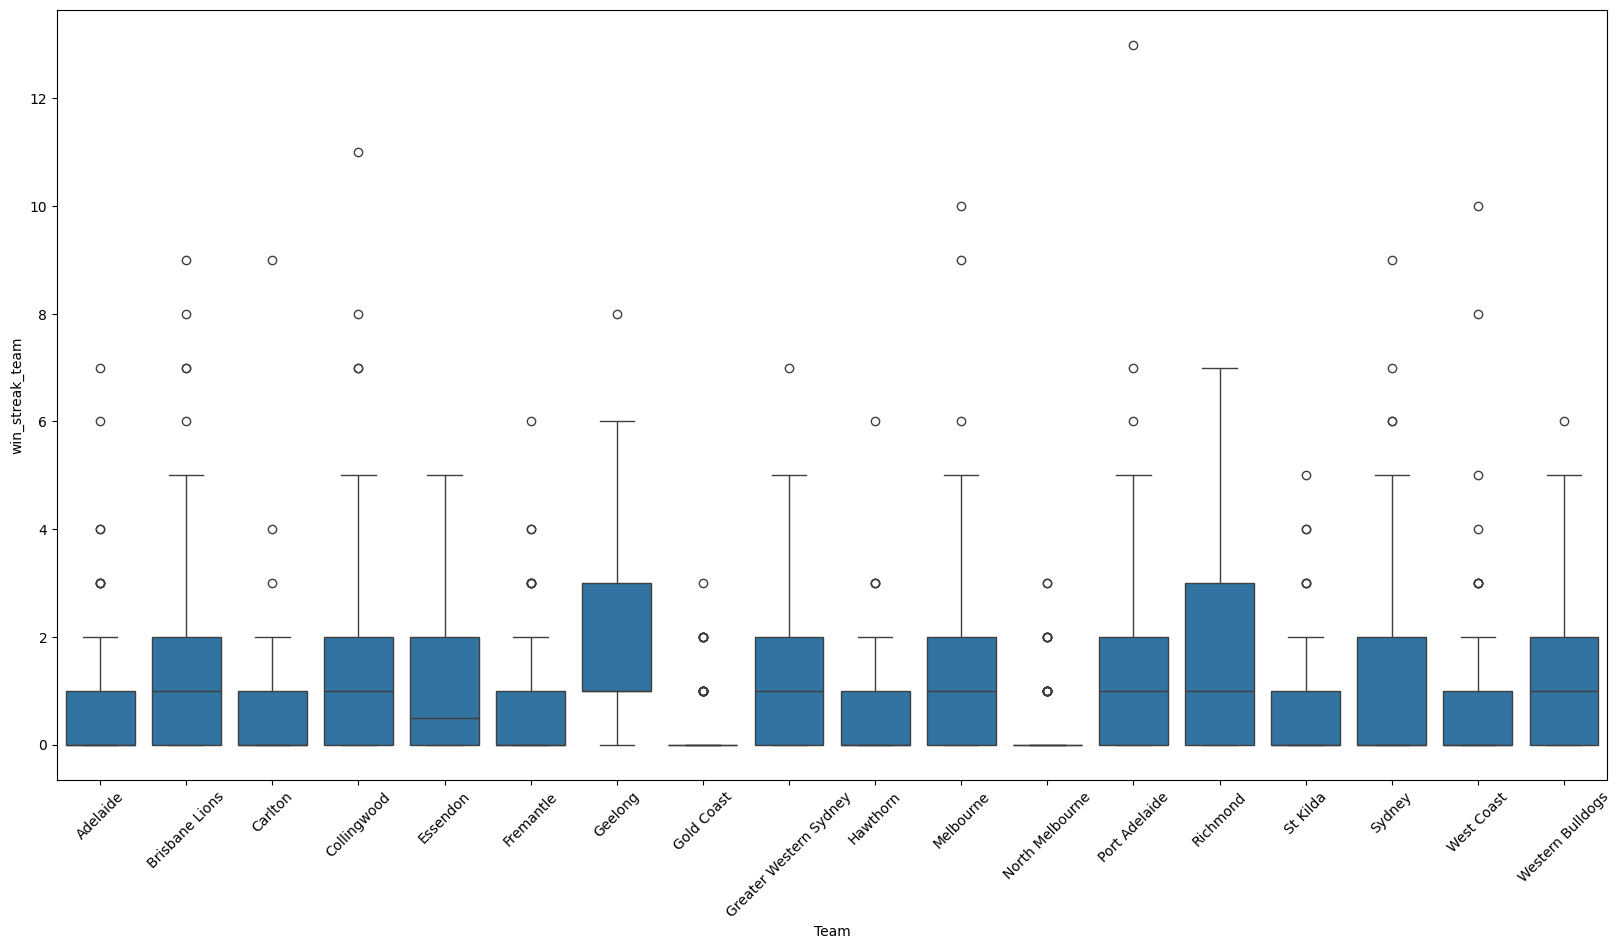

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_win_streaks,x='Team',y='win_streak_team',ax=ax)
plt.xticks(rotation=45)

In [176]:
df_win_streaks.loc[df_win_streaks['Team']=='Geelong',:]['win_streak_team'].unique()

array([5., 0., 3., 4., 1., 2., 8., 6.])

Text(0, 0.5, 'Count')

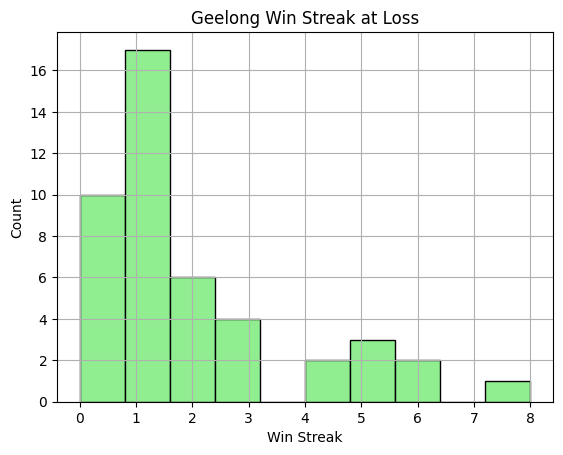

In [177]:
ax = df_win_streaks.loc[df_win_streaks['Team']=='Geelong',:]['win_streak_team'].hist(edgecolor='black',color='lightgreen',bins=10)
ax.set_title('Geelong Win Streak at Loss')
ax.set_xlabel('Win Streak')
ax.set_ylabel('Count')

<Axes: xlabel='win_streak_team'>

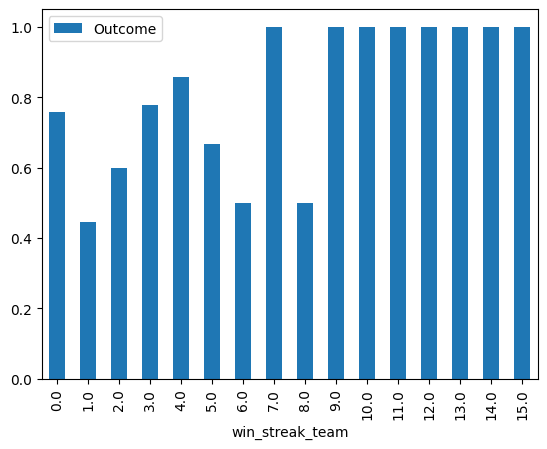

In [178]:
df_matches_v3.loc[(df_matches_v3['Team']=='Geelong')&(df_matches_v3['Season']>=2018),['win_streak_team','Outcome']].\
groupby('win_streak_team').mean().plot.bar()